In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
from collections import defaultdict

In [2]:
# DA = 'data analyst'
# DS = 'data scientist'
# DE = 'data engineer'

# South Africa
sa_DA = pd.read_csv("sa_DA.csv")
sa_DS = pd.read_csv("sa_DS.csv")
sa_DE = pd.read_csv("sa_DE.csv")

# United States
us_DA = pd.read_csv("us_DA.csv")
us_DS = pd.read_csv("us_DS.csv")
us_DE = pd.read_csv("us_DE.csv")

# United Kingdom
uk_DA = pd.read_csv("uk_DA.csv")
uk_DS = pd.read_csv("uk_DS.csv")
uk_DE = pd.read_csv("uk_DE.csv")

# Australia
au_DA = pd.read_csv("au_DA.csv")
au_DS = pd.read_csv("au_DS.csv")
au_DE = pd.read_csv("au_DE.csv")

dataframes = [sa_DA, sa_DS, sa_DE,
              us_DA, us_DS, us_DE,
              uk_DA, uk_DS, uk_DE,
              au_DA, au_DS, au_DE]

In [3]:
sa_DA.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Senior Data Transformation Analyst,-1,Whats in it for you?\n\nThis position offers n...,4.0,IHS Markit\n4.0,Cape Town,-1,10000+ Employees,2016,Company - Public,Consulting,Business Services,$2 to $5 billion (USD),-1
1,Data Analyst,-1,Minimum requirements for the role:\n\nA degree...,3.1,Prostaff Holdings\n3.1,Johannesburg,-1,Unknown,-1,Unknown,-1,-1,Less than $1 million (USD),-1
2,Reporting & Data Analyst,-1,Reporting & Data Analyst\n\nIntroduction:\n\nA...,2.9,The Revenue Optimization Companies\n2.9,Remote,-1,5001 to 10000 Employees,2000,Company - Private,Consumer Electronics & Appliances Stores,Retail,$100 to $500 million (USD),-1
3,Junior Data Developer System Analyst,-1,Adapt IT\nJunior Data Developer System Analyst...,4.0,AdaptIT\n4.0,Johannesburg,-1,51 to 200 Employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1
4,"Data Analyst - Johannesburg, South Africa",-1,EY’s newly established Africa Data Delivery Ce...,3.8,EY\n3.8,Johannesburg,-1,10000+ Employees,1989,Company - Private,Accounting,Accounting & Legal,$10+ billion (USD),-1


In [4]:
sa_DA.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
# unfortunately the data from a glassdoor search quuery has duplicate job listings
# need to drop duplictate jobs: (job description is the best identifier)

counter = 0
for df in dataframes:
    if counter == 0: print("SA") 
    if counter == 3: print("\nUS")
    if counter == 6: print("\nUK")
    if counter == 9: print("\nAU")
    counter += 1
    print(str(counter)+": ",len(df["Job Description"]),"(original)",
          len(df.drop_duplicates(subset="Job Description")),"(dropped)")

SA
1:  78 (original) 76 (dropped)
2:  220 (original) 214 (dropped)
3:  790 (original) 709 (dropped)

US
4:  1000 (original) 720 (dropped)
5:  1000 (original) 673 (dropped)
6:  800 (original) 551 (dropped)

UK
7:  785 (original) 646 (dropped)
8:  1000 (original) 699 (dropped)
9:  800 (original) 622 (dropped)

AU
10:  1000 (original) 160 (dropped)
11:  468 (original) 168 (dropped)
12:  800 (original) 157 (dropped)


In [6]:
for df in dataframes:
    df.drop_duplicates(subset="Job Description", inplace=True)

In [7]:
# remove new line chars from job descriptions, company name

for df in dataframes:
    df["Job Description"] = df["Job Description"].str.replace("\n", " ")
    df["Company Name"] = df["Company Name"].str.replace("\n", " ")

In [8]:
techs = ["Python", "R", "Julia", "Java", "C", "Scala", "Bash", "PowerBi", "Tableau", "Excel", "VBA", "Macros","Alteryx", 
         "Spotfire", "Qlik", "Looker", "SAS", "ERP", "SAP", "MS Navision", "SAGE", "AccPac", "SQL", "Sql", "NoSql", "NoSQL", 
         "MongoDB", "Postgres", "PostgreSQL", "mySQL", "XML", "HTML", "CSS", "Javascript", "Hadoop", "Spark", "PySpark", 
         "SparkR", "Kafka", "ETL", "Oracle", "Storm", "AWS", "Cassandra", "Azkaban", "Airflow", "Luigi", "MATLAB", 
         "Snowflake", "BigQuery", "Azure", "GCP", "Perl", "Presto", "HBase", "Hive", "Druid", "Docker", "TensorFlow"]
pattern = "|".join(r"\b{}\b".format(x) for x in techs)

In [9]:
for df in dataframes:
    df["Technologies"] = df["Job Description"].str.findall(pattern, flags=re.I).str.join(", ").replace("", "Not found")

In [10]:
def get_degree_level(df):
    """
    Degree level
    """
 
    result = []

    for row in df["Job Description"]:
        try:
            jd = row.split(" ")
            
            if "bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            if "master's" in map(lambda x: x.lower(), jd):   
                result.append(["masters"])
            elif "Master's" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "Masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            if "phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Ph.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "PH.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "doctorate" in map(lambda x: x.lower(), jd):
                result.append(["phd"])

            else: 
                result.append(["UNSPECIFIED"])
                continue
                
        except: continue
        
    return result

In [11]:
degree_level = get_degree_level(us_DE)

In [13]:
def get_degree_major(df):
    """
    Degree type (major)
    """
    
    # refine this list + add two word majors
    majors_short = ["quantititive", "IT", "engineering", "marketing", "business", "commerce", 
                    "statistics", "maths", "mathematics", "physics", "chemistry", "epidemiology"]
    VALIDATE = ["engineering", "mathematics", "actuarial"]
    majors_long = ["computer", "data"]
    DTEST = defaultdict(int)
    result = []
    
    for row in df["Job Description"]:
        try:
            if "degree" in row.lower():
                subset = row.split("degree")[1]
                for major in majors_short:
                    if major in subset:
                        result.append(major)
        
        except: continue
            
    return result

In [14]:
degree_type = get_degree_major(us_DS)

In [16]:
# dict to count degree types
deg_type_count = defaultdict(int)

for word in degree_type:
    deg_type_count[word] += 1
    
deg_type_count_sort = {k: v for k, v in sorted(deg_type_count.items(), key=lambda item: item[1], reverse=True)}
deg_type_count_sort

{'business': 115,
 'statistics': 65,
 'engineering': 62,
 'IT': 43,
 'mathematics': 37,
 'marketing': 14,
 'physics': 12,
 'chemistry': 9,
 'commerce': 6,
 'epidemiology': 1}

In [17]:
# dict to count degree levels
deg_level_count = defaultdict(int)

for l in degree_level:
    for word in l:
         deg_level_count[word] += 1
    
deg_level_count_sort = {k: v for k, v in sorted(deg_level_count.items(), key=lambda item: item[1], reverse=True)}
deg_level_count_sort

{'UNSPECIFIED': 541, 'bachelors': 195, 'masters': 32, 'phd': 10}

possible NMF?

## Part A: By Job Title

### i. Data Analyst

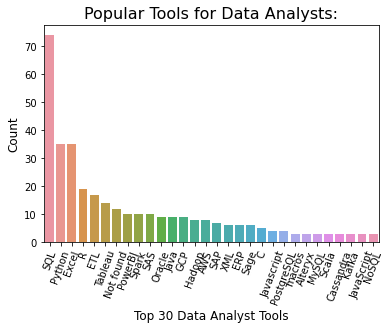

In [39]:
sa_DA_tech_count = defaultdict(int)
for item in sa_DA["Technologies"]:
    names = item.split(", ")
    for name in names:
        sa_DA_tech_count[name] += 1
    
sa_DA_tech_count_sort = {k: v for k, v in sorted(sa_DA_tech_count.items(), key=lambda item: item[1], reverse=True)}
keys = list(sa_DA_tech_count_sort.keys())
vals = [sa_DA_tech_count_sort[k] for k in keys]
sns.barplot(x=keys[:30], y=vals[:30]).set_xticklabels(labels = keys[:30], rotation=70)
plt.xlabel("Top 30 Data Analyst Tools", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Popular Tools for Data Analysts:", size=16);

### ii. Data Scientist

### iii. Data Engineer

### iv. Combined

## Part B: By Country

### i. South Africa

### ii. United States

### iii. United Kingdom

### iv. Australia

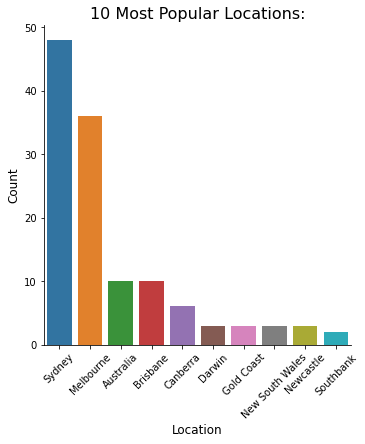

In [34]:
sns.catplot(data = au_DA, x = "Location", kind = "count", order=au_DA["Location"].value_counts().iloc[:10].index).set_xticklabels(rotation=45)
plt.xlabel("Location", size = 12)
plt.ylabel("Count", size = 12)
plt.title("10 Most Popular Locations:", size=16);

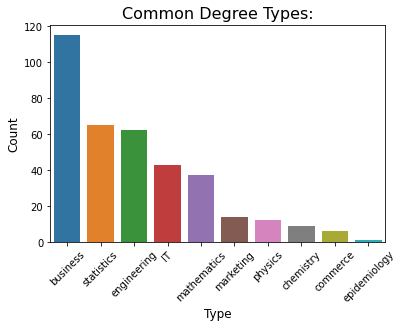

In [32]:
keys = list(deg_type_count_sort.keys())
vals = [deg_type_count_sort[k] for k in keys]
sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 45)
plt.xlabel("Type", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Common Degree Types:", size=16);

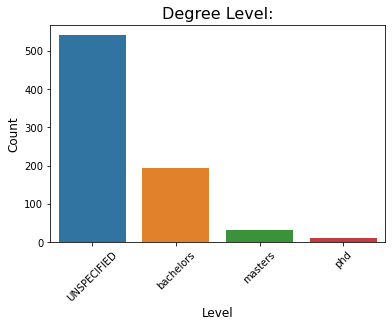

In [31]:
keys = list(deg_level_count_sort.keys())
vals = [deg_level_count_sort[k] for k in keys]
sns.barplot(x = keys, y = vals).set_xticklabels(labels = keys, rotation= 45)
plt.xlabel("Level", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Degree Level:", size=16);

### v. Combined